# Setup

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.api as sm
import numpy as np

In [143]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [169]:
df = pd.read_csv('./sti.csv')

Season Number                   Startup Name  Episode Number  \
0                1                  TheStatePlate              20   
1                1                         Alpino              25   
2                1                     GrowFitter              32   
3                1                   ZyppElectric               0   
4                1                       HappyBar               0   
5                2                          SoupX               2   
6                2                      Flatheads               5   
7                2                     FastBeetle              15   
8                2                         VSMani              16   
9                2                      Bullspree              19   
10               2                    CloudTailor              21   
11               2                        PadCare              23   
12               2                  TheGreenSnack              27   
13               2                         Barosi              29   
14               2                      Nirmalaya              31   
15               2                TheHealthyBinge              33   
16               2                       Freakins              33   
17               2                        Perfora              34   
18               2                       neuphony              36   
19               2                        GladFul              39   
20               2                         GROWiT              40   
21               2                     ProostBeer              42   
22               2                  HealthyMaster              44   
23               2              TheHealthyFactory              46   
24               2                    LilGoodness              48   
25               2                      WickedGud              49   
26               2                          MYBYK              50   
27               2                         GODESi              51   
28               2                            TAC              51   
29               2                        ZenOnco               0   
30               3                      AdilQadri               1   
31               3                         RodBez               3   
32               3                     Homversity               3   
33               3                      Bartisans               5   
34               3                         Aretto               6   
35               3                       WYLDCard               8   
36               3                    upliance.ai               8   
37               3                     RooftopApp               9   
38               3                       EvaScalp              11   
39               3                         Elitty              11   
40               3                      DecodeAge              14   
41               3                          AltCo              16   
42               3           ToffeeCoffeeRoasters              19   
43               3                           ORBO              20   
44               3                        D'chica              22   
45               3                        Artinci              23   
46               3                        Aroleap              26   
47               3                AvataarSkincare              30   
48               3                       Niblerzz              34   
49               3                         Sorich              34   
50               3                    CremeCastle              35   
51               3                         Cup-ji              38   
52               3                  AToddlerThing              38   
53               3                   iDreamCareer              39   
54               3                   RockPaperRum              39   
55               3                         Sukham              40   
56               3                     KaabilKids              42   
57 

# Cleanup

In [145]:
df['Male Presenters'].fillna(0, inplace=True)
df['Female Presenters'].fillna(0, inplace=True)
df['Transgender Presenters'].fillna(0, inplace=True)

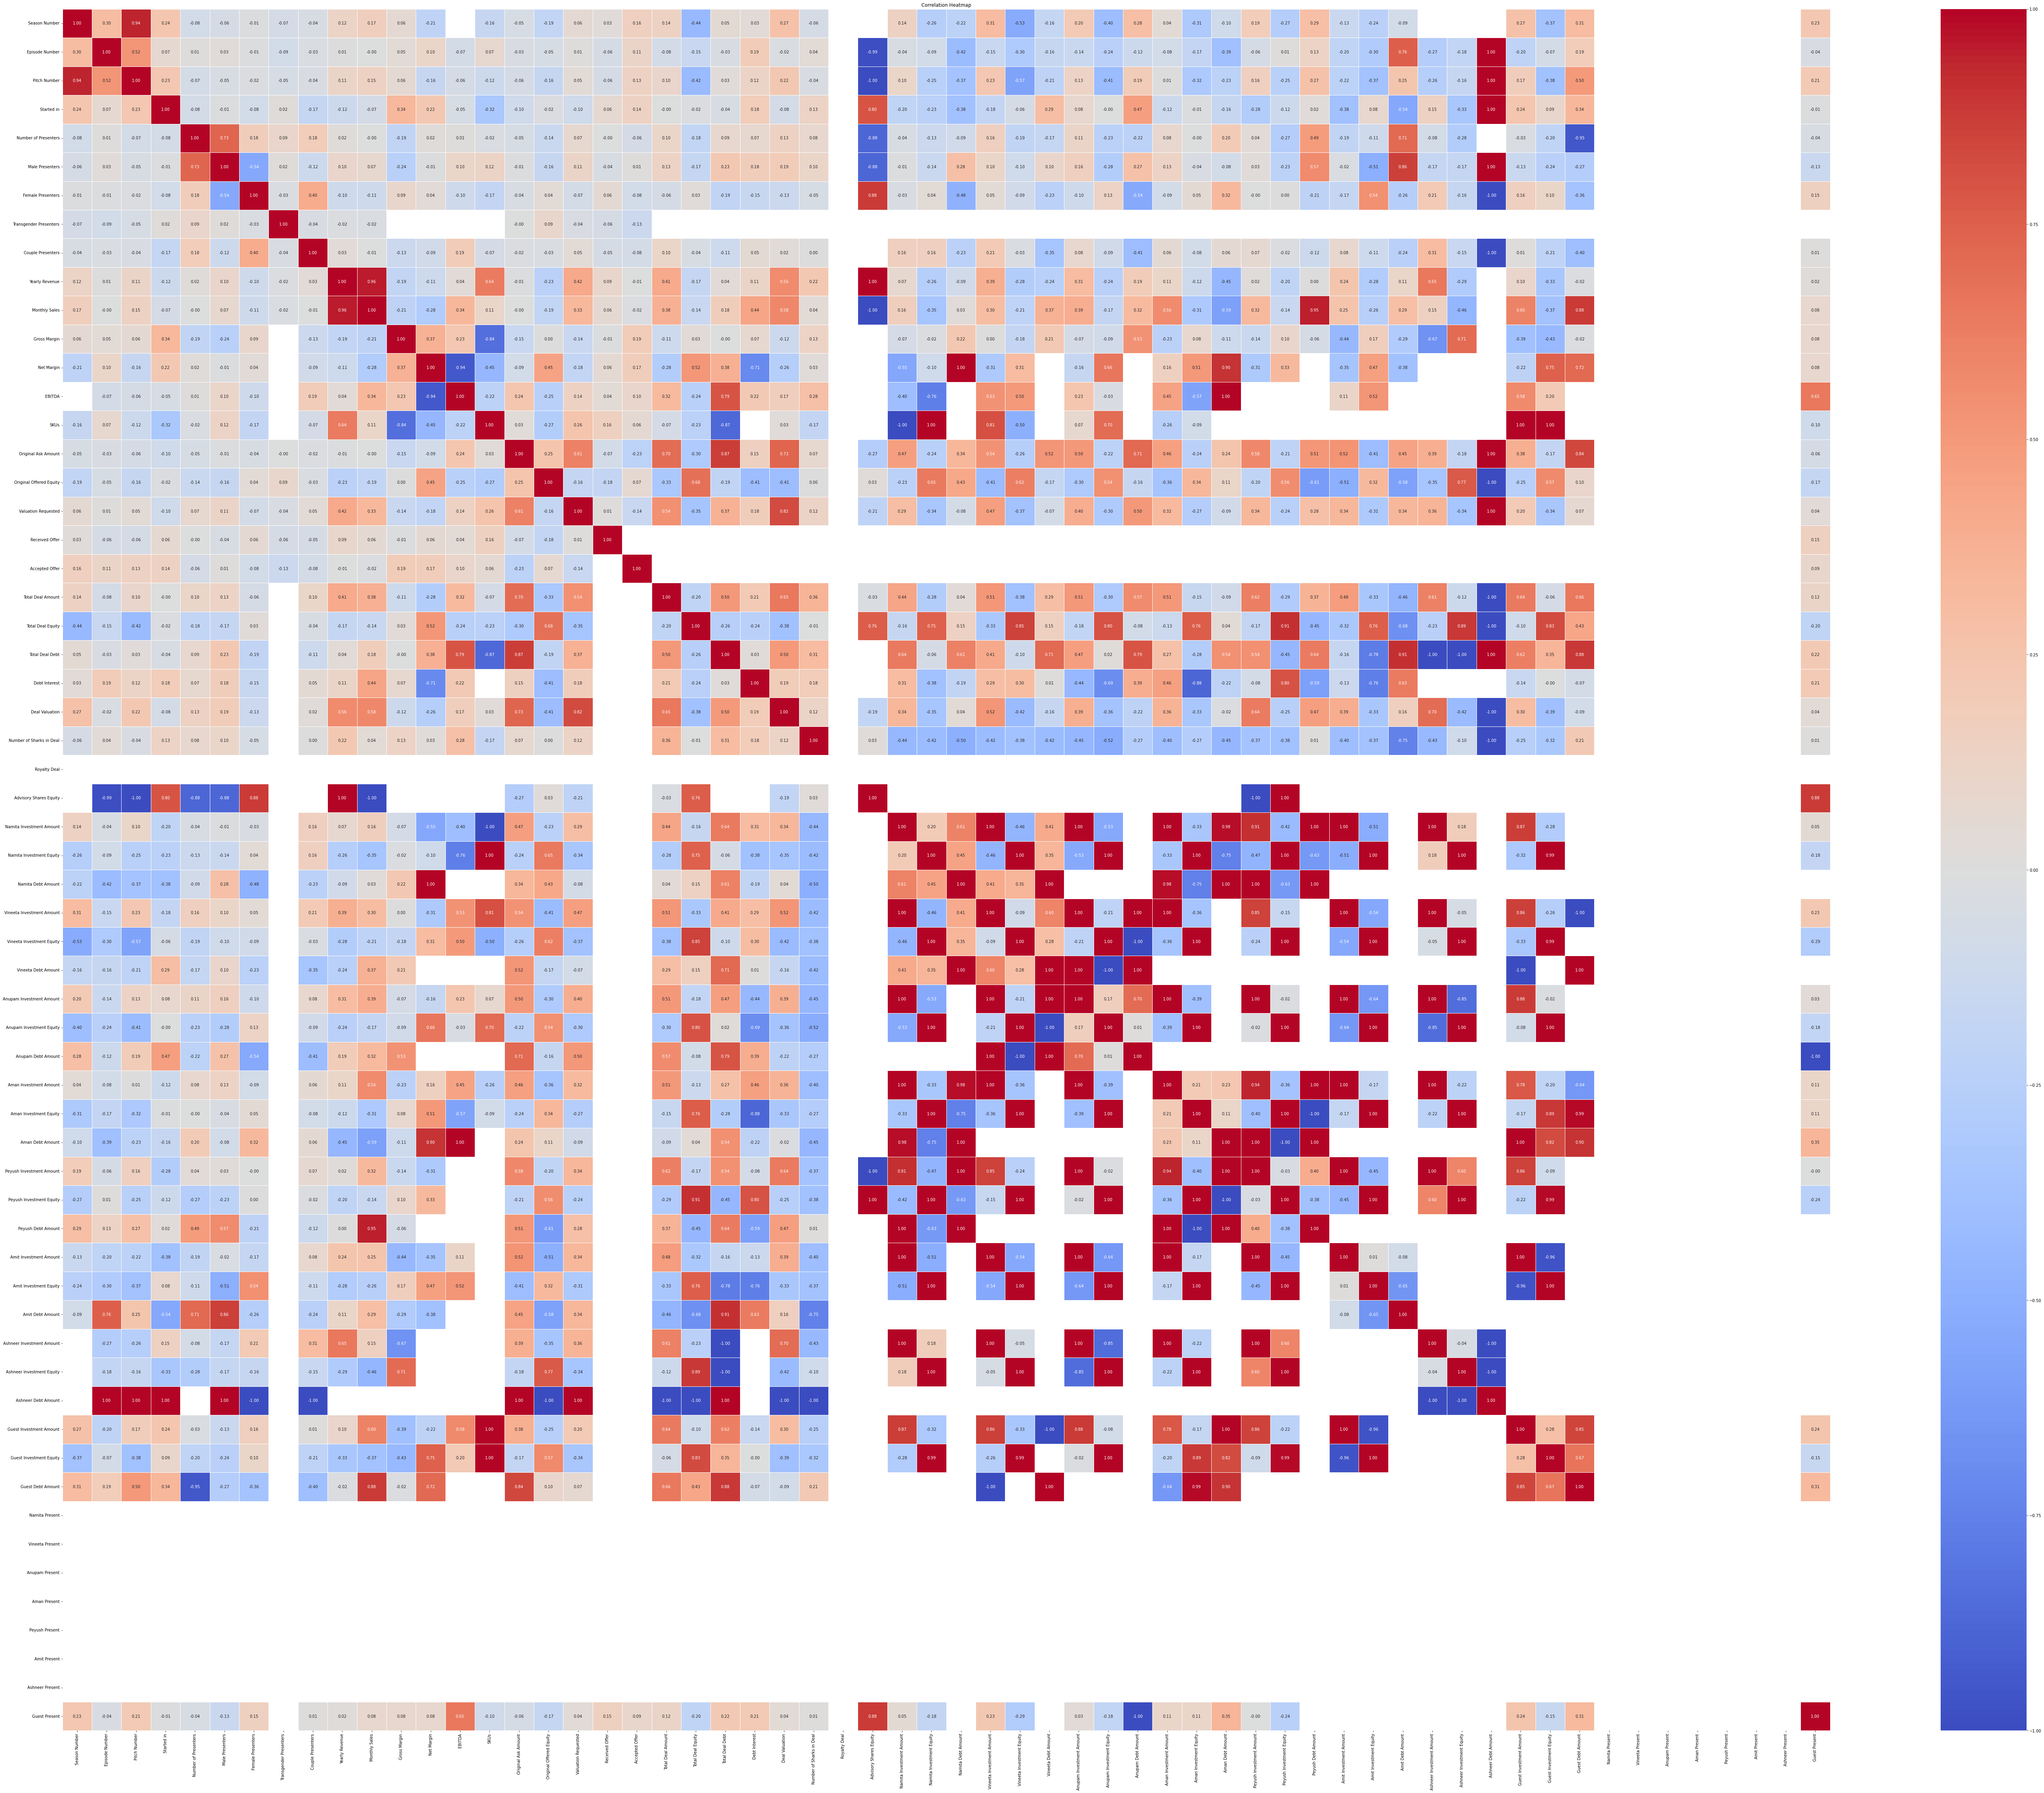

In [146]:
correlation_matrix = df.corr()

## Create a scatterplot matrix
# sns.set_theme(style="ticks")
# sns.pairplot(df, kind="scatter")
# plt.show()

## Create a heatmap
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
# plt.show()

plt.savefig(fname='heatmap')

# Loss Aversion

- Higher net and gross margin indicate lower risk involved in a business.
- The absence of cash burn and the presence of previous funding indicates lower risk in a business.

### Logistic regression to see whether gross margin predicts offer reception

Optimization terminated successfully.
         Current function value: 0.592034
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Received Offer   No. Observations:                  129
Model:                          Logit   Df Residuals:                      127
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:               6.520e-05
Time:                        11:13:28   Log-Likelihood:                -76.372
converged:                       True   LL-Null:                       -76.377
Covariance Type:            nonrobust   LLR p-value:                    0.9205
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0004      0.551      1.816      0.069      -0.079       2.080
Gross Margin    -0.0009

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


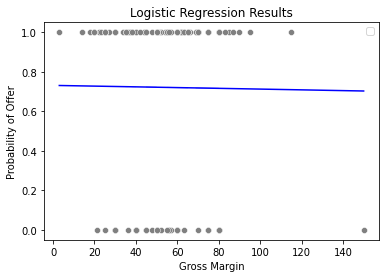

In [147]:
# columns_to_keep = ['column1', 'column2', 'column3']
IV = "Gross Margin"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf = tdf.dropna()
tdf

X = sm.add_constant(tdf[IV])

# Convert categorical variable 'B' to dummy variables
# If 'B' is already encoded as 0 and 1, you can skip this step
# If 'B' has more than two categories, you may need to use pd.get_dummies() to create dummy variables
# For example:
# df = pd.get_dummies(df, columns=['B'], drop_first=True)

# Create the logistic regression model
logit_model = sm.Logit(tdf[DV], X)

# Fit the model
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray', label='Actual data')
# sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue', label='Logistic regression line')
sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray')
sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue')
plt.xlabel(IV)
plt.ylabel('Probability of Offer')
plt.title('Logistic Regression Results')
plt.legend()
plt.show()

**Verdict**

P-value is very large and the plot of the regression line doesn't match well with the data either. Hence we can say that Gross Margin doesn't predict offer reception odds.

### Logistic regression to see whether net margin predicts offer reception

Optimization terminated successfully.
         Current function value: 0.610152
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Received Offer   No. Observations:                   73
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                0.003053
Time:                        11:28:25   Log-Likelihood:                -44.541
converged:                       True   LL-Null:                       -44.677
Covariance Type:            nonrobust   LLR p-value:                    0.6014
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6154      0.498      1.236      0.217      -0.361       1.592
Net Margin     0.0111      0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


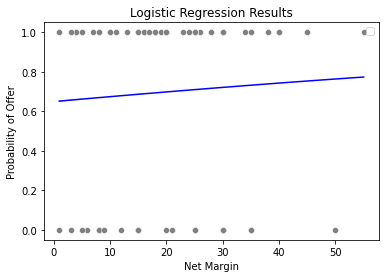

In [187]:
# columns_to_keep = ['column1', 'column2', 'column3']
IV = "Net Margin"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf = tdf.dropna()
tdf

X = sm.add_constant(tdf[IV])

# Convert categorical variable 'B' to dummy variables
# If 'B' is already encoded as 0 and 1, you can skip this step
# If 'B' has more than two categories, you may need to use pd.get_dummies() to create dummy variables
# For example:
# df = pd.get_dummies(df, columns=['B'], drop_first=True)

# Create the logistic regression model
logit_model = sm.Logit(tdf[DV], X)

# Fit the model
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray', label='Actual data')
# sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue', label='Logistic regression line')
sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray')
sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue')
plt.xlabel(IV)
plt.ylabel('Probability of Offer')
plt.title('Logistic Regression Results')
plt.legend()
plt.show()

**Verdict**

P-value is very large and the plot of the regression line doesn't match well with the data either. Hence we can say that Net Margin doesn't predict offer reception odds.

*Note:* p-value correction need not be considered since the corrected values will only decrease further from our standard of $\alpha = 0.05$

### Chi-Square test using the presence of Cash Burn to predict Offer Reception

In [149]:
IV = "Cash Burn"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf.fillna("no", inplace=True)
tdf

# Create a contingency table
contingency_table = pd.crosstab(tdf[IV].dropna(), tdf[DV].dropna())

# Perform chi-square test of independence
chi2_statistic, p_value, dof, expected = sp.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square test results:
Chi-square statistic: 0.022194307092986146
p-value: 0.8815713565330441
Degrees of freedom: 1
Expected frequencies:
 [[135.9790795 278.0209205]
 [ 21.0209205  42.9790795]]


**Verdict**

The Chi-Square test returns that there is no statical significance of the presence of cash burn on Offer reception.

### Visualisation

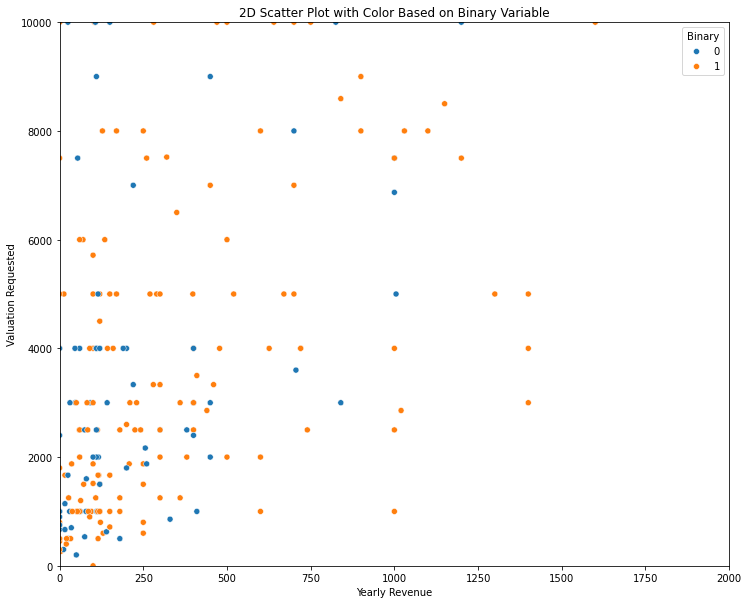

In [150]:
x = 'Yearly Revenue'
y = 'Valuation Requested'
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Yearly Revenue', y='Valuation Requested', hue='Received Offer', data=df)

# Add labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title('2D Scatter Plot with Color Based on Binary Variable')

plt.xlim(0, 2000)
plt.ylim(0, 10000)

# Show the plot
plt.legend(title='Binary', loc='upper right')
plt.show()

# Anchoring Effect

In [151]:
tdf = df[['Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Total Deal Amount']].copy().dropna()

# Extract X and Y from the DataFrame
X = tdf[['Original Ask Amount', 'Original Offered Equity', 'Valuation Requested']]
Y = tdf[['Total Deal Amount']]    # Dependent variable

# No need to reshape Y
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(Y, X)
result = model.fit()

# Print the coefficients
# print("Intercept:", model.intercept_)
# print("Coefficient:", model.coef_)
print(result.summary())

# Optionally, you can plot the original data and the regression line
# import matplotlib.pyplot as plt

# plt.scatter(X, Y, color='blue', label='Original data')
# plt.plot(X, Y_pred, color='red', label='Fitted line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Linear Regression')
# plt.legend()
# plt.show()

                            OLS Regression Results                            
Dep. Variable:      Total Deal Amount   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     87.79
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.98e-39
Time:                        11:13:31   Log-Likelihood:                -1297.0
No. Observations:                 268   AIC:                             2602.
Df Residuals:                     264   BIC:                             2616.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Risk-taking Propensity

Per-shark analysis was foregone since not enough data exists with enough stats reported for each shark. Instead we will be profiling overall sharks' risk-taking propensity. 

Optimization terminated successfully.
         Current function value: 0.605323
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Received Offer   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                 0.03602
Time:                        11:38:01   Log-Likelihood:                -16.949
converged:                       True   LL-Null:                       -17.582
Covariance Type:            nonrobust   LLR p-value:                    0.2604
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5476      0.458      1.197      0.231      -0.349       1.445
SKUs           0.0014      0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


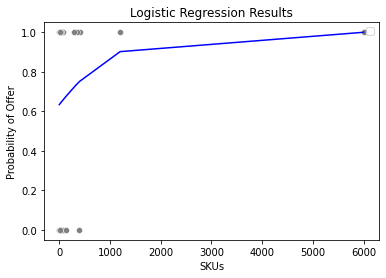

In [194]:
# columns_to_keep = ['column1', 'column2', 'column3']
IV = "SKUs"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf = tdf.dropna()
tdf

X = sm.add_constant(tdf[IV])

# Convert categorical variable 'B' to dummy variables
# If 'B' is already encoded as 0 and 1, you can skip this step
# If 'B' has more than two categories, you may need to use pd.get_dummies() to create dummy variables
# For example:
# df = pd.get_dummies(df, columns=['B'], drop_first=True)

# Create the logistic regression model
logit_model = sm.Logit(tdf[DV], X)

# Fit the model
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray', label='Actual data')
# sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue', label='Logistic regression line')
sns.scatterplot(x=tdf[IV], y=tdf[DV], color='gray')
sns.lineplot(x=tdf[IV], y=result.predict(X), color='blue')
plt.xlabel(IV)
plt.ylabel('Probability of Offer')
plt.title('Logistic Regression Results')
plt.legend()
plt.show()


**Verdict**

A business with many SKUs indicate a lower risk investment.

Althouhg, SKUs seem to not influence the decision of sharks giving an offer.

In [195]:
IV = "Has Patents"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf.fillna("no", inplace=True)
tdf

# Create a contingency table
contingency_table = pd.crosstab(tdf[IV].dropna(), tdf[DV].dropna())

# Perform chi-square test of independence
chi2_statistic, p_value, dof, expected = sp.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square test results:
Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[142.87656904 292.12343096]
 [ 14.12343096  28.87656904]]


In [154]:
IV = "Bootstrapped"
DV = "Received Offer"
tdf = df[[IV, DV]].copy(deep=True)
tdf.fillna("no", inplace=True)
tdf

# Create a contingency table
contingency_table = pd.crosstab(tdf[IV].dropna(), tdf[DV].dropna())

# Perform chi-square test of independence
chi2_statistic, p_value, dof, expected = sp.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square test results:
Chi-square statistic: 0.338133980315893
p-value: 0.8444523314961103
Degrees of freedom: 2
Expected frequencies:
 [[  9.19665272  18.80334728]
 [141.23430962 288.76569038]
 [  6.56903766  13.43096234]]


# Gender and Background Biases

In [193]:
IV = "Male Presenters"
DV = "Amit Debt Amount"
tdf = df[[IV, DV]].copy(deep=True).dropna()
# tdf.fillna("no", inplace=True)
tdf


correlation = df[IV].corr(df[DV])
correlation

0.7692875136699701

The P-Value is 0.007517. The result is significant at p < .05.

In [190]:
IV = "Female Presenters"
DV = "Amit Debt Amount"
tdf = df[[IV, DV]].copy(deep=True).dropna()
# tdf.fillna("no", inplace=True)
tdf


correlation = df[IV].corr(df[DV])
correlation

-0.7113283517139576

Insignificant.

In [191]:
IV = "Female Presenters"
DV = "Namita Investment Equity"
tdf = df[[IV, DV]].copy(deep=True).dropna()
# tdf.fillna("no", inplace=True)
tdf


correlation = df[IV].corr(df[DV])
correlation

-0.13209109527167007

The P-Value is 0.001115. The result is significant at p < .05.

# Industry Bias

In [173]:
df['Vineeta Invested'] = df['Vineeta Investment Amount'].notna() | df['Vineeta Investment Equity'].notna() | df['Vineeta Debt Amount'].notna()
df['Amit Invested'] = df['Amit Investment Amount'].notna() | df['Amit Investment Equity'].notna() | df['Amit Debt Amount'].notna()
df['Namita Invested'] = df['Namita Investment Amount'].notna() | df['Namita Investment Equity'].notna() | df['Namita Debt Amount'].notna()
df['Aman Invested'] = df['Aman Investment Amount'].notna() | df['Aman Investment Equity'].notna() | df['Aman Debt Amount'].notna()
df['Anupam Invested'] = df['Anupam Investment Amount'].notna() | df['Anupam Investment Equity'].notna() | df['Anupam Debt Amount'].notna()
df['Ashneer Invested'] = df['Ashneer Investment Amount'].notna() | df['Ashneer Investment Equity'].notna() | df['Ashneer Debt Amount'].notna()
df['Peyush Invested'] = df['Peyush Investment Amount'].notna() | df['Peyush Investment Equity'].notna() | df['Peyush Debt Amount'].notna()

df

Season Number                   Startup Name  Episode Number  \
0                1                  TheStatePlate              20   
1                1                         Alpino              25   
2                1                     GrowFitter              32   
3                1                   ZyppElectric               0   
4                1                       HappyBar               0   
5                2                          SoupX               2   
6                2                      Flatheads               5   
7                2                     FastBeetle              15   
8                2                         VSMani              16   
9                2                      Bullspree              19   
10               2                    CloudTailor              21   
11               2                        PadCare              23   
12               2                  TheGreenSnack              27   
13               2                         Barosi              29   
14               2                      Nirmalaya              31   
15               2                TheHealthyBinge              33   
16               2                       Freakins              33   
17               2                        Perfora              34   
18               2                       neuphony              36   
19               2                        GladFul              39   
20               2                         GROWiT              40   
21               2                     ProostBeer              42   
22               2                  HealthyMaster              44   
23               2              TheHealthyFactory              46   
24               2                    LilGoodness              48   
25               2                      WickedGud              49   
26               2                          MYBYK              50   
27               2                         GODESi              51   
28               2                            TAC              51   
29               2                        ZenOnco               0   
30               3                      AdilQadri               1   
31               3                         RodBez               3   
32               3                     Homversity               3   
33               3                      Bartisans               5   
34               3                         Aretto               6   
35               3                       WYLDCard               8   
36               3                    upliance.ai               8   
37               3                     RooftopApp               9   
38               3                       EvaScalp              11   
39               3                         Elitty              11   
40               3                      DecodeAge              14   
41               3                          AltCo              16   
42               3           ToffeeCoffeeRoasters              19   
43               3                           ORBO              20   
44               3                        D'chica              22   
45               3                        Artinci              23   
46               3                        Aroleap              26   
47               3                AvataarSkincare              30   
48               3                       Niblerzz              34   
49               3                         Sorich              34   
50               3                    CremeCastle              35   
51               3                         Cup-ji              38   
52               3                  AToddlerThing              38   
53               3                   iDreamCareer              39   
54               3                   RockPaperRum              39   
55               3                         Sukham              40   
56               3                     KaabilKids              42   
57 

In [159]:
# number of investments each shark made in each industry

df_vineeta = df[df['Vineeta Invested'] == True]
df_amit = df[df['Amit Invested'] == True]
df_namita = df[df['Namita Invested'] == True]
df_aman = df[df['Aman Invested'] == True]
df_anupam = df[df['Anupam Invested'] == True]
df_ashneer = df[df['Ashneer Invested'] == True]
df_peyush = df[df['Peyush Invested'] == True]

vineeta_investments = df_vineeta['Industry'].value_counts()
amit_investments = df_amit['Industry'].value_counts()
namita_investments = df_namita['Industry'].value_counts()
aman_investments = df_aman['Industry'].value_counts()
anupam_investments = df_anupam['Industry'].value_counts()
ashneer_investments = df_ashneer['Industry'].value_counts()
peyush_investments = df_peyush['Industry'].value_counts()

# # stacked bar chart of investments by industry

# plt.figure(figsize=(60, 10))
# plt.bar(vineeta_investments.index, vineeta_investments.values, label='Vineeta')
# plt.bar(amit_investments.index, amit_investments.values, label='Amit', bottom=vineeta_investments.values)
# plt.bar(namita_investments.index, namita_investments.values, label='Namita', bottom=amit_investments.values)
# plt.bar(aman_investments.index, aman_investments.values, label='Aman', bottom=namita_investments.values)
# plt.bar(anupam_investments.index, anupam_investments.values, label='Anupam', bottom=aman_investments.values)
# plt.legend()
# plt.show()

df_stack_bar = pd.DataFrame()

df_stack_bar['Vineeta'] = vineeta_investments
df_stack_bar['Amit'] = amit_investments
df_stack_bar['Namita'] = namita_investments
df_stack_bar['Aman'] = aman_investments
df_stack_bar['Anupam'] = anupam_investments
df_stack_bar['Ashneer'] = ashneer_investments
df_stack_bar['Peyush'] = peyush_investments

# replace nan values with 0

df_stack_bar = df_stack_bar.fillna(0)

df_industry = df_stack_bar.copy(deep=True)

df_stack_bar

Vineeta  Amit  Namita  Aman  Anupam  Ashneer  \
Food                               23  10.0    14.0    22      16      8.0   
Beauty/Fashion                     20   8.0    18.0    22      16      2.0   
Manufacturing                       4   1.0    10.0     9      11      2.0   
Furnishing/Household                3   3.0     5.0     3       3      0.0   
Vehicles/Electrical Vehicles        3   1.0     0.0     4       3      3.0   
Technology/Software                 3   3.0     8.0    14       5      1.0   
Liquor/Beverages                    3   0.0     0.0     4       2      0.0   
Medical/Health                      3   4.0    18.0    13      11      0.0   
Sports                              2   0.0     2.0     2       1      1.0   
Electronics                         2   1.0     0.0     1       2      0.0   
Services                            2   3.0     7.0     8       2      0.0   

                              Peyush  
Food                            13.0  
Beauty/Fashion                  12.0  
Manufacturing                   13.0  
Furnishing/Household             2.0  
Vehicles/Electrical Vehicles     2.0  
Technology/Software             10.0  
Liquor/Beverages                 2.0  
Medical/Health                  13.0  
Sports                           4.0  
Electronics                      0.0  
Services                         9.0

In [160]:
# Divide each row by the sum of the row
df_stack_bar = df_stack_bar.div(df_stack_bar.sum(axis=1), axis=0)

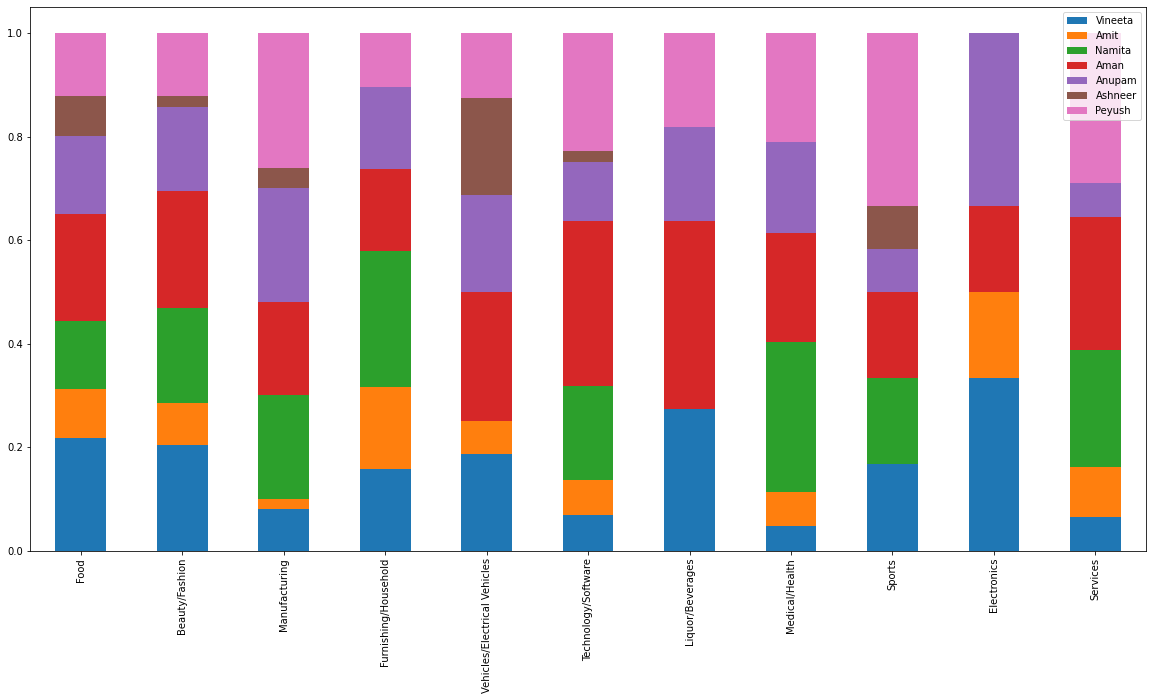

In [161]:
# df to stacked bar chart

df_stack_bar.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.show()

In [162]:
obs = df_industry.iloc[5, :].values.flatten().tolist()

Xi2, pval, df, expected = sp.chi2_contingency(obs)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Chi-square test results:
Chi-square statistic: 0.338133980315893
p-value: 0.8444523314961103


In [185]:
no_of_industries = 11
sharks = ["Vineeta", "Amit", "Namita", "Aman", "Anupam", "Ashneer", "Peyush"]

def oneD_industry_chi2(obs, exp):
	scale = 100

	# make everything percentage wise
	obs_sum = obs.sum()
	obs = obs.apply(lambda x: x/obs_sum * scale)
	# print("obs:\n", obs)
	exp_sum = exp.sum()
	exp = exp.apply(lambda x: x/exp_sum * scale)
	# print("exp:\n", exp)


	# Calculate chi-square statistic
	chi_squared = sum((observed - expected) ** 2 / expected for observed, expected in zip(obs, exp))

	# Determine degrees of freedom
	dof = len(obs) - 1
	pval = sp.chi2.sf(chi_squared, dof)

	corrected_pval = 0.05/ no_of_industries
	if(corrected_pval >= pval):
		print("*")
	print("Chi-square test results:")
	print("Chi-square statistic:", chi_squared)
	print("p-value: ", pval)
	# print("Differences:")


	# for idx, shark in enumerate(sharks):
	# 	print(shark, obs[idx] - exp[idx])

	return chi_squared, dof


industries = ["Food" , "Beauty/Fashion", "Manufacturing", "Vehicles", "Health", "Beverages", "Furnishing/Household", "Software", "Sports", "Electronics", "Services"]

exp = df_industry.sum(axis=0, numeric_only=True)
exp = exp.apply(lambda x : x/no_of_industries)

for idx, ind in enumerate(industries):
	obs = df_industry.iloc[idx, :]
	print(ind)
	chi_squared, dof = oneD_industry_chi2(obs, exp)
	print("\n")



Food
Chi-square test results:
Chi-square statistic: 10.50511467390604
p-value:  0.10492955939678454


Beauty/Fashion
Chi-square test results:
Chi-square statistic: 4.473159763324609
p-value:  0.6129222724428596


Manufacturing
Chi-square test results:
Chi-square statistic: 14.781674238801216
p-value:  0.02202448843520739


Vehicles
*
Chi-square test results:
Chi-square statistic: 21.64912346939992
p-value:  0.0014014826201954177


Health
*
Chi-square test results:
Chi-square statistic: 81.82923560049018
p-value:  1.4960820685851867e-15


Beverages
Chi-square test results:
Chi-square statistic: 11.75610838889745
p-value:  0.0676362047466957


Furnishing/Household
*
Chi-square test results:
Chi-square statistic: 48.44703721709068
p-value:  9.618845600212956e-09


Software
Chi-square test results:
Chi-square statistic: 18.414566600943914
p-value:  0.005275534678896844


Sports
*
Chi-square test results:
Chi-square statistic: 32.56049681616097
p-value:  1.2737960299731817e-05


Electronics

In [183]:
# df_old = df[df['Pitchers Average Age'] == 'Old']
df_young = df[df['Pitchers Average Age'] == 'Young']
df_middle = df[df['Pitchers Average Age'] == 'Middle']

# old_investments = df_old['Industry'].value_counts()
young_investments = df_young['Industry'].value_counts()
middle_investments = df_middle['Industry'].value_counts()

# print(old_investments)
# print(young_investments)
# print(middle_investments)

df_stack_bar_age = pd.DataFrame()

# df_stack_bar_age['Old'] = old_investments
df_stack_bar_age['Young'] = young_investments
df_stack_bar_age['Middle'] = middle_investments

# replace nan values with 0

df_stack_bar_age = df_stack_bar_age.fillna(0)

df_stack_bar_age

df_ages = df_stack_bar_age.copy(deep=True)

# df_stack_bar_age = df_stack_bar_age.div(df_stack_bar_age.sum(axis=1), axis=0)

# df_stack_bar_age.plot(kind='bar', stacked=True, figsize=(20, 10))
# #print a horizontal line at 0.5
# plt.axhline(y=0.400881, color='r', linestyle='-')
# plt.show()

In [184]:
no_of_industries = 11
ages = ["Young", "Middle"]

def oneD_age_chi2(obs, exp):
	scale = 100

	# make everything percentage wise
	obs_sum = obs.sum()
	obs = obs.apply(lambda x: x/obs_sum * scale)
	# print("obs:\n", obs)
	exp_sum = exp.sum()
	exp = exp.apply(lambda x: x/exp_sum * scale)
	# print("exp:\n", exp)


	# Calculate chi-square statistic
	chi_squared = sum((observed - expected) ** 2 / expected for observed, expected in zip(obs, exp))

	# Determine degrees of freedom
	dof = len(obs) - 1
	pval = sp.chi2.sf(chi_squared, dof)

	corrected_pval = 0.05/ no_of_industries
	if(corrected_pval >= pval):
		print("*")
	print("Chi-square test results:")
	print("Chi-square statistic:", chi_squared)
	print("p-value: ", pval)
	# print("Differences:")


	# for idx, age in enumerate(ages):
	# 	print(age, obs[idx] - exp[idx])

	return chi_squared, dof


industries = ["Food" , "Beauty/Fashion", "Manufacturing", "Vehicles", "Health", "Beverages", "Furnishing/Household", "Software", "Sports", "Electronics", "Services"]

exp = df_ages.sum(axis=0, numeric_only=True)
exp = exp.apply(lambda x : x/no_of_industries)

for idx, ind in enumerate(industries):
	obs = df_ages.iloc[idx, :]
	print(ind)
	chi_squared, dof = oneD_age_chi2(obs, exp)
	print("\n")


Food
Chi-square test results:
Chi-square statistic: 0.7393994265882013
p-value:  0.38985333112342035


Beauty/Fashion
Chi-square test results:
Chi-square statistic: 0.9611961552153785
p-value:  0.32688569124557376


Manufacturing
Chi-square test results:
Chi-square statistic: 0.013883104262113026
p-value:  0.9062050640519661


Vehicles
Chi-square test results:
Chi-square statistic: 0.34707760655282516
p-value:  0.5557721062799803


Health
Chi-square test results:
Chi-square statistic: 0.02191540653079093
p-value:  0.8823123602484914


Beverages
*
Chi-square test results:
Chi-square statistic: 13.956170703575541
p-value:  0.00018712242813811425


Furnishing/Household
Chi-square test results:
Chi-square statistic: 1.9722425127830532
p-value:  0.16021003294639907


Software
Chi-square test results:
Chi-square statistic: 0.05333333333333334
p-value:  0.8173613313851769


Sports
Chi-square test results:
Chi-square statistic: 0.27548209366391097
p-value:  0.5996778196343218


Electronics
*
C